#Data Visualization on Stroke Detection Dataset

#Importing Modules Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

#Importing Dataset

In [2]:
df = pd.read_csv("/content/healthcare.csv")
print(df.head())

      id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]


#Data pre-processing

In [3]:
df.drop('id', axis='columns', inplace=True)
print(df.head(5))

   gender   age  hypertension  ...   bmi   smoking_status stroke
0    Male  67.0             0  ...  36.6  formerly smoked      1
1  Female  61.0             0  ...   NaN     never smoked      1
2    Male  80.0             0  ...  32.5     never smoked      1
3  Female  49.0             0  ...  34.4           smokes      1
4  Female  79.0             1  ...  24.0     never smoked      1

[5 rows x 11 columns]


In [4]:
for col in df.columns:
    print(col)

gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [10]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool


In [11]:
df["bmi"].fillna(df["bmi"].median(), inplace=True)

#Basic Visualization to understand the data

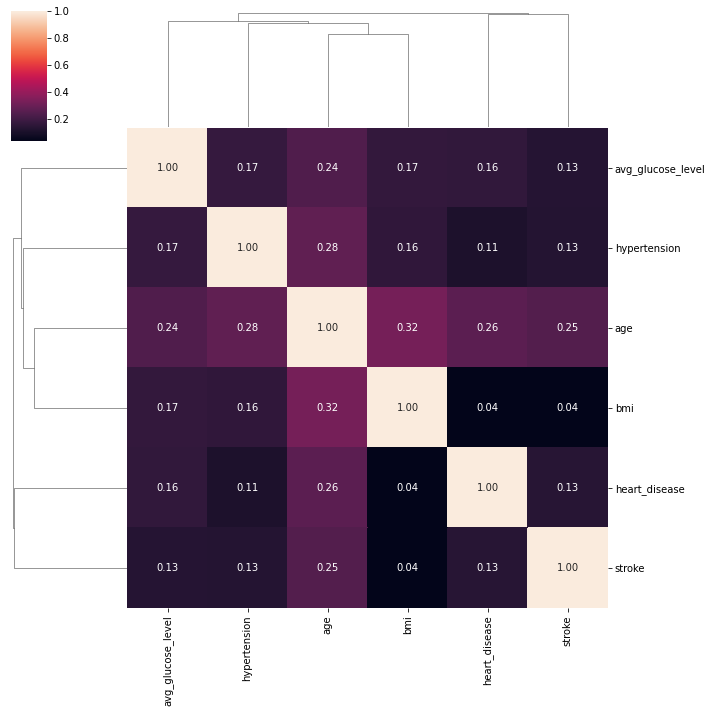

In [12]:
corr_data =  df.corr()
sns.clustermap(corr_data, annot=True, fmt='.2f')

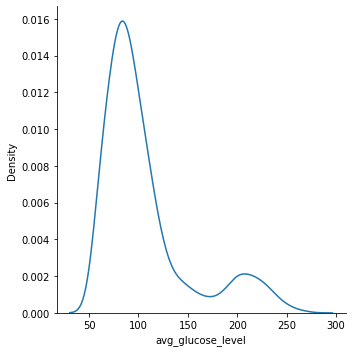

In [13]:
sns.displot(df, x="avg_glucose_level", kind="kde")

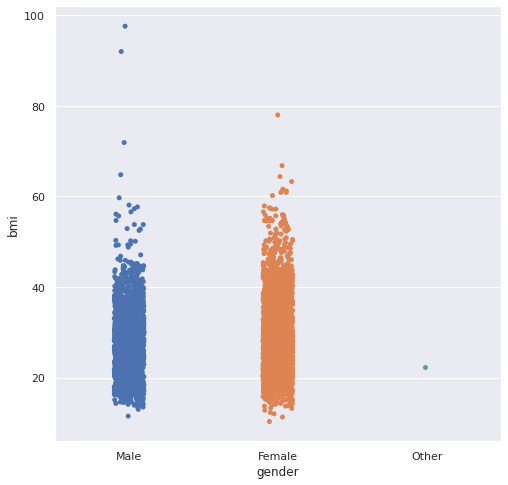

In [14]:
sns.set(rc = {'figure.figsize':(8,8)})
ax = sns.stripplot(x='gender', y='bmi', data=df)

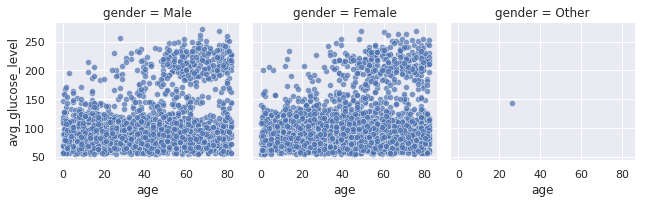

In [15]:
g = sns.FacetGrid(df, col="gender")
g.map(sns.scatterplot, "age", "avg_glucose_level", alpha=.7)
g.add_legend()

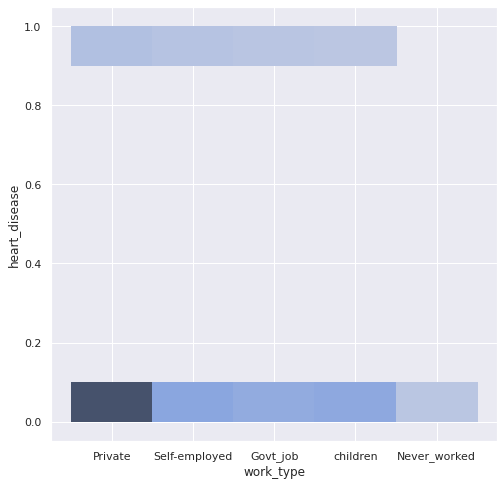

In [16]:
sns.histplot(data=df, x="work_type", y="heart_disease", bins=10)

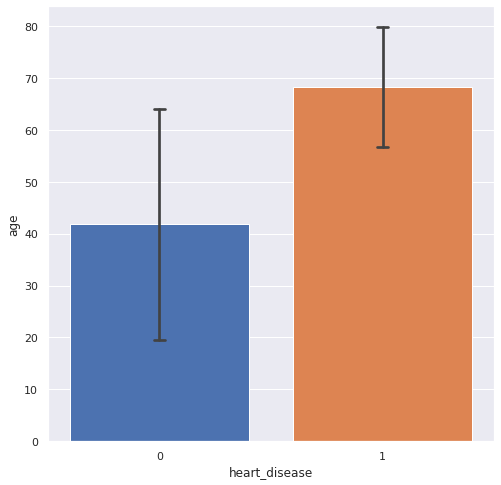

In [17]:
sns.barplot(x="heart_disease", y="age", data=df,
capsize = 0.05,             
saturation = 8,
ci = 'sd',)


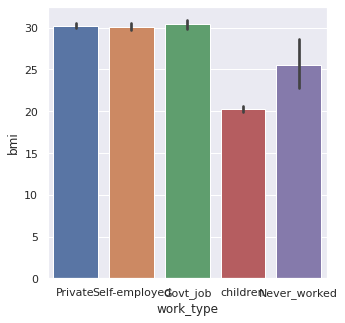

In [18]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='work_type', y='bmi', data=df)


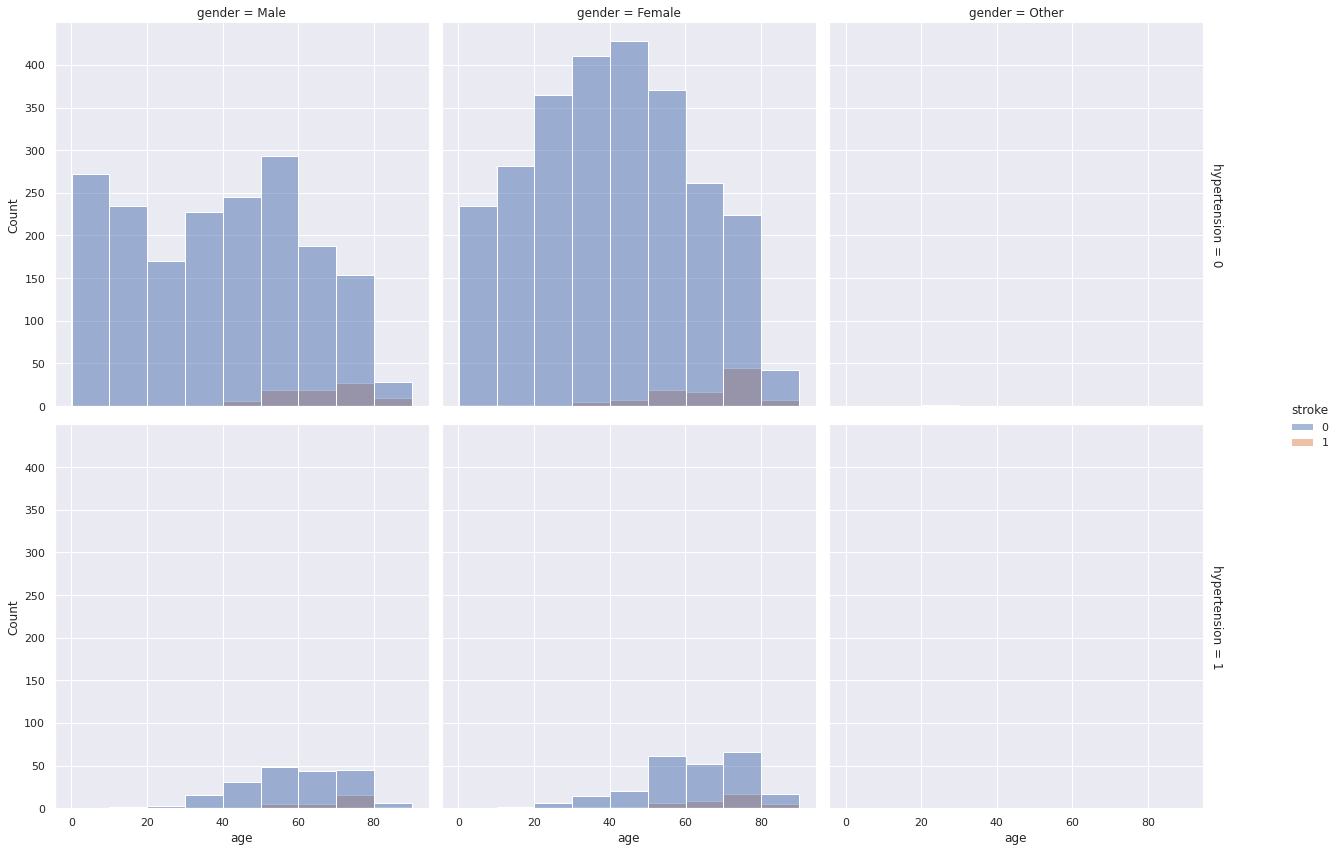

In [19]:
sns.displot(
    df, x="age", col="gender", row="hypertension", hue="stroke",legend=True,
    binwidth=10, height=6, facet_kws=dict(margin_titles=True),
)

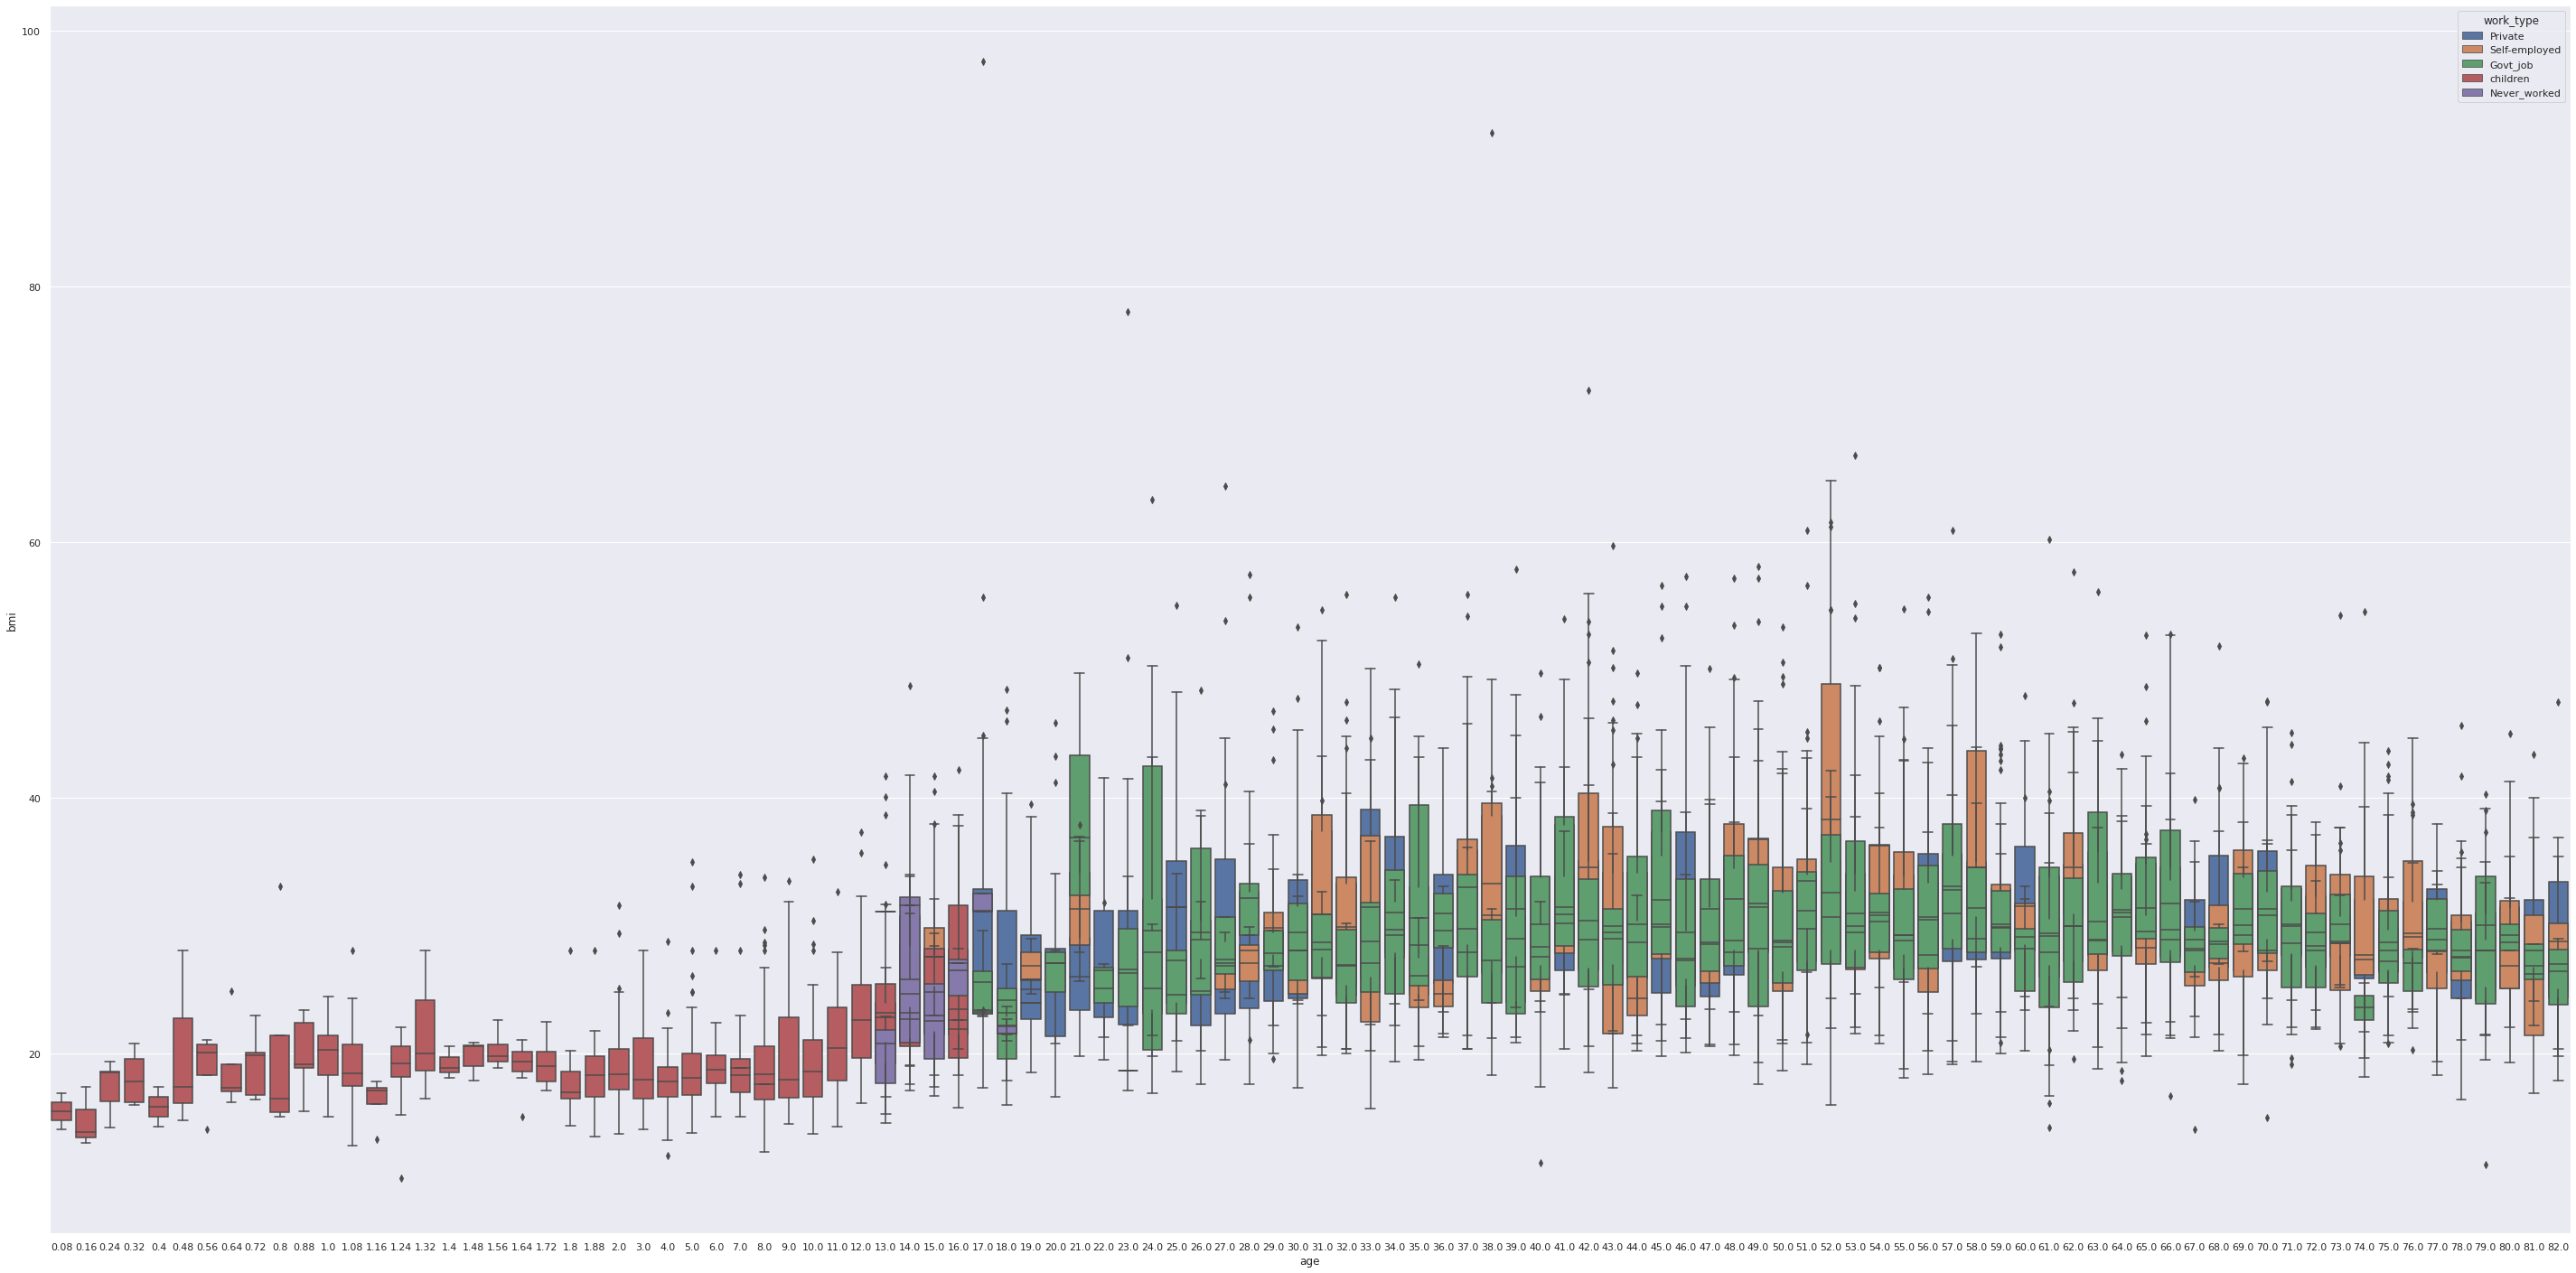

In [20]:
sns.set(rc = {'figure.figsize':(50,25)})
df["ever_smoked"] = df["gender"].isin(["Male", "Female"])
ax = sns.boxplot(x="age", y="bmi", hue="work_type",
                 data=df, dodge=False)

In [21]:
from warnings import filterwarnings
filterwarnings('ignore')
y = df["stroke"] #Dependent variable
X = df.drop(["stroke"], axis=1) #Independent variable
X['smoking_status'] = X['smoking_status'].replace({'formerly smoked' or 'smokes':'smoked','never smoked' or 'Unknown':'non_smoking'})
#4 Status downgraded to Status 2.
X['smoking_status'] = [1 if i.strip() == 'smoked' else 0 for i in X.smoking_status]
X['gender'] = [1 if i.strip() == 'Male' else 0 for i in X.gender]
X['ever_married'] = [1 if i.strip() == 'Yes' else 0 for i in X.ever_married]
X['Residence_type'] = [1 if i.strip() == 'Urban' else 0 for i in X.Residence_type]

X = X.drop(["work_type"], axis=1)

X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,ever_smoked
0,1,67.0,0,1,1,1,228.69,36.6,1,True
1,0,61.0,0,0,1,0,202.21,28.1,0,True
2,1,80.0,0,1,1,0,105.92,32.5,0,True
3,0,49.0,0,0,1,1,171.23,34.4,0,True
4,0,79.0,1,0,1,0,174.12,24.0,0,True


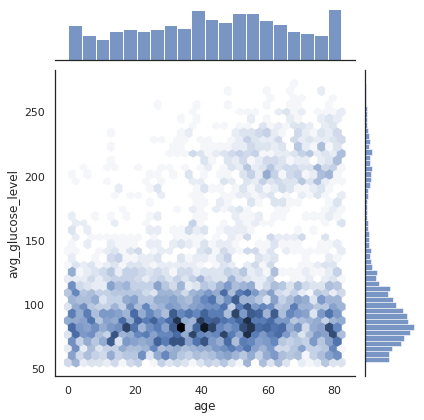

In [22]:
with sns.axes_style('white'):
    g = sns.jointplot("age", "avg_glucose_level", df, kind='hex')

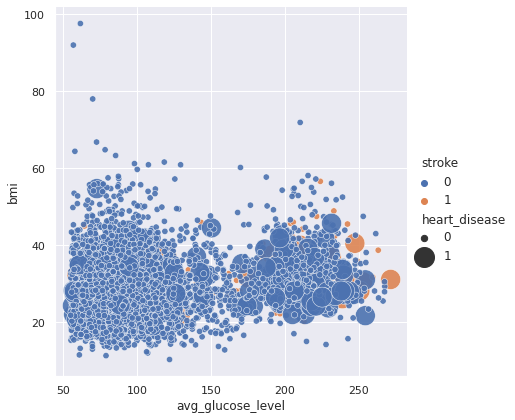

In [23]:
sns.relplot(x="avg_glucose_level", y="bmi", hue="stroke", size="heart_disease",
            sizes=(400, 40), alpha=0.9,
            height=6, data=df)

#Creating the Machine Learning Model Using Pycaret

In [28]:
#import pycaret
from pycaret.classification import *
clf1 = setup(data = df, target = 'stroke')
# return best model
best = compare_models()
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)
# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9519,0.8461,0.0059,0.1000,0.0111,0.0106,0.0237,0.402
lda,Linear Discriminant Analysis,0.9466,0.8368,0.0569,0.2833,0.0938,0.0779,0.1067,0.024
gbc,Gradient Boosting Classifier,0.9460,0.8351,0.0173,0.1000,0.0287,0.0170,0.0243,0.360
ada,Ada Boost Classifier,0.9508,0.8167,0.0170,0.2000,0.0311,0.0267,0.0498,0.180
lightgbm,Light Gradient Boosting Machine,0.9449,0.8145,0.0516,0.2761,0.0824,0.0654,0.0924,0.094
nb,Naive Bayes,0.4211,0.8010,0.9598,0.0751,0.1391,0.0543,0.1569,0.019
rf,Random Forest Classifier,0.9491,0.7867,0.0056,0.0333,0.0095,0.0041,0.0044,0.616
et,Extra Trees Classifier,0.9444,0.7600,0.0111,0.0400,0.0174,0.0036,0.0015,0.554
knn,K Neighbors Classifier,0.9427,0.6897,0.0170,0.0500,0.0249,0.0083,0.0069,0.129
dt,Decision Tree Classifier,0.9161,0.5696,0.1859,0.1620,0.1725,0.1286,0.1292,0.023


In [29]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9553,0.8970,0.0588,1.0,0.1111,0.1064,0.2370
1,0.9525,0.7219,0.0000,0.0,0.0000,0.0000,0.0000
2,0.9525,0.8363,0.0000,0.0,0.0000,0.0000,0.0000
3,0.9497,0.8904,0.0000,0.0,0.0000,0.0000,0.0000
4,0.9497,0.8235,0.0000,0.0,0.0000,0.0000,0.0000
5,0.9497,0.8940,0.0000,0.0,0.0000,0.0000,0.0000
6,0.9524,0.8282,0.0000,0.0,0.0000,0.0000,0.0000
7,0.9524,0.7965,0.0000,0.0,0.0000,0.0000,0.0000
8,0.9524,0.8907,0.0000,0.0,0.0000,0.0000,0.0000
9,0.9524,0.8827,0.0000,0.0,0.0000,0.0000,0.0000


In [31]:
pred_holdout = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9511,0.8174,0.0132,1.0,0.026,0.0247,0.1119


In [35]:
lr_final = finalize_model(lr)


In [36]:
save_model(lr, 'stroke_prediction_using_linear-regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='stroke',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

In [37]:
lr_saved = load_model('stroke_prediction_using_linear-regression')

Transformation Pipeline and Model Successfully Loaded
